In [1]:
import seaborn as sns

In [52]:
df = sns.load_dataset('titanic')

In [53]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

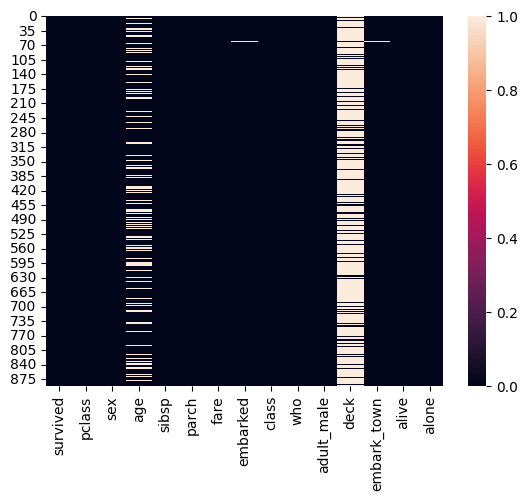

In [55]:
sns.heatmap(df.isnull())

In [56]:
#row deletion
df.dropna().shape

(182, 15)

In [57]:
df.shape

(891, 15)

In [58]:
#column deletion
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [59]:
#Inputation techniques
#1-mean Value Inputation

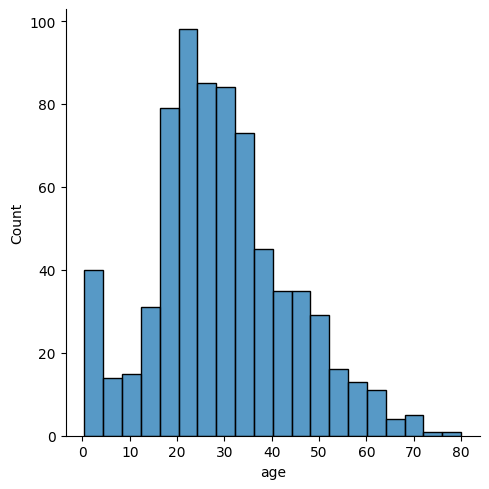

In [60]:
sns.displot(df['age'])

In [61]:
df.age.isnull().sum()

np.int64(177)

In [62]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [63]:
df[['Age_mean','age']]

#This technique is called as mean imputation,it works well when the data is normally distributed

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [64]:
#Meadian Imputation

#Generally in case of outliers,median imputation is used

df['Age_median'] = df['age'].fillna(df['age'].median())
df[['Age_median','age']]

,Age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


In [65]:
#Mode Imputation: For categorical data

df[df['embarked'].isnull()]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [66]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [67]:
df['Age_mode'] = df['age'].fillna(df['age'].mode()[0])
df[['Age_mode','age']]

,Age_mode,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,24.0,NaN
889,26.0,26.0


In [68]:
#means no na values is included
mode = df[df['age'].notna()]['embarked'].mode()[0]

In [69]:
mode

'S'

In [70]:
df['embarked'] = df['embarked'].fillna(mode)

In [ ]:
df['embarked'].isnull().sum()

np.int64(0)